<a href="https://colab.research.google.com/github/Drime648/fake-news-detector/blob/main/fake_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
fake_df = pd.read_csv("https://raw.githubusercontent.com/Drime648/fake-news-detector/main/Fake.csv")

In [ ]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
true_df = pd.read_csv("https://raw.githubusercontent.com/Drime648/fake-news-detector/main/True.csv")

In [ ]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_df["label"] = "fake"
true_df["label"] = "true"

In [ ]:
fake_df, true_df

(                                                   title  ... label
 0       Donald Trump Sends Out Embarrassing New Year’...  ...  fake
 1       Drunk Bragging Trump Staffer Started Russian ...  ...  fake
 2       Sheriff David Clarke Becomes An Internet Joke...  ...  fake
 3       Trump Is So Obsessed He Even Has Obama’s Name...  ...  fake
 4       Pope Francis Just Called Out Donald Trump Dur...  ...  fake
 ...                                                  ...  ...   ...
 23476  McPain: John McCain Furious That Iran Treated ...  ...  fake
 23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...  fake
 23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...  fake
 23479  How to Blow $700 Million: Al Jazeera America F...  ...  fake
 23480  10 U.S. Navy Sailors Held by Iranian Military ...  ...  fake
 
 [23481 rows x 5 columns],
                                                    title  ... label
 0      As U.S. budget fight looms, Republicans flip t...  ...  true
 1   

In [ ]:
big_df = pd.concat([fake_df, true_df])

In [ ]:
big_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [ ]:
from sklearn.utils import shuffle
big_df = shuffle(big_df)

In [ ]:
big_df

,title,text,subject,date,label
6437,This Is Proof That Donald Trump May Be The WO...,While there have been what seems like dozens o...,News,"May 11, 2016",fake
1287,Republicans eye alternatives for getting to 20...,WASHINGTON (Reuters) - Republican lawmakers ar...,politicsNews,"October 12, 2017",true
2254,Chicago touts new debt structure aimed at savi...,CHICAGO (Reuters) - Under a plan announced on ...,politicsNews,"August 9, 2017",true
4552,Trump to host Jordan's King Abdullah on April ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"March 31, 2017",true
8820,Watch Jennifer Lawrence PERFECTLY Identify Wh...,Modern day culture is far from what it used to...,News,"January 11, 2016",fake
...,...,...,...,...,...
2262,Gold Star Dad Forced To Cancel Canada Trip Af...,"Khizr Khan, a Muslim-American gold star dad wh...",News,"March 6, 2017",fake
10295,"As appellate judge, Garland viewed as friend o...",WASHINGTON (Reuters) - Supreme Court nominee M...,politicsNews,"March 16, 2016",true
7260,New Yorkers build walls of sticky notes in def...,NEW YORK (Reuters) - This is not the kind of w...,politicsNews,"November 15, 2016",true
9204,Senator Warren to endorse Clinton Thursday nig...,WASHINGTON (Reuters) - U.S. Senator Elizabeth ...,politicsNews,"June 9, 2016",true


In [ ]:
import numpy as np
split = np.round(0.8 * len(big_df))
split = int(split)

In [ ]:
train_df = big_df[:split]

In [ ]:
val_df = big_df[split:]

In [ ]:
len(train_df), len(val_df)

(35918, 8980)

In [ ]:
train_titles = train_df["title"].to_list()
train_text = train_df["text"].to_list()
train_subject = train_df["subject"].to_numpy()
train_labels = train_df["label"].to_numpy()

In [ ]:
train_text

['While there have been what seems like dozens of Republican debates, one stands on its own as the one Trump didn t attend. That debate happened in January, and in lieu of attending, Trump held a rally that was supposed to raise money for veterans. Unfortunately, though, half the $6 million raised never got to the veterans and no one knows where it is.The Trump campaign said the event raised $6 million for different veterans groups, with Trump himself contributing $1 million, but details released by the campaign Thursday show only about half of that money has been dispersed so far.The campaign did not provide specifics earlier this week, but after a CNN report aired Thursday morning questioning the contributions, a spokeswoman shared a list in the afternoon showing 27 veterans organizations that have received a total of $2.9 million to date.The campaign promised that it was no big deal and that the veterans would get the money as soon as they figured it out. Well, several months have p

In [ ]:
train_titles

[' This Is Proof That Donald Trump May Be The WORST Money Manager In The Campaign (VIDEO)',
 'Republicans eye alternatives for getting to 20 percent corporate tax rate',
 'Chicago touts new debt structure aimed at saving money',
 "Trump to host Jordan's King Abdullah on April 5: White House",
 ' Watch Jennifer Lawrence PERFECTLY Identify What’s Wrong With Modern Day Life (VIDEO)',
 'Factbox: Clinton to name running mate as early as Friday',
 'Syrian Kurds hold local elections, press on with autonomy plans',
 'Obama challenges Communist-led Cuba with call for democracy',
 'Senate Democrats ask Trump attorney general pick to recuse himself from Russia probes',
 'Trump budget would slash cleanup of hazardous waste sites by 30 percent',
 'NATION OF ISLAM Joins #BlackLivesMatter Terrorists To Shut Down Chicago’s Popular “Miracle Mile” On Busiest Shopping Day Of Year [Videos and Photos]',
 'DONALD TRUMP Sits On Obama’s Right…Why This Is Significant!',
 ' Trump’s Meeting With Germany’s Angela

In [ ]:
train_subject

array(['News', 'politicsNews', 'politicsNews', ..., 'left-news',
       'worldnews', 'politicsNews'], dtype=object)

In [ ]:
train_labels

array(['fake', 'true', 'true', ..., 'fake', 'true', 'true'], dtype=object)

In [ ]:
val_titles = val_df["title"].to_list()
val_text = val_df["text"].to_list()
val_subject = val_df["subject"].to_numpy()
val_labels = val_df["label"].to_numpy()

#Labels to nums

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
one_hot_train_labels = one_hot_encoder.fit_transform(train_df["label"].to_numpy().reshape(-1,1))
one_hot_val_labels = one_hot_encoder.transform(val_df["label"].to_numpy().reshape(-1,1))

In [ ]:
one_hot_train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
train_labels

* [1, 0] = fake
* [0, 1] = true

#Make Pipelines

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_text, one_hot_train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_text, one_hot_val_labels))

In [ ]:
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<PrefetchDataset shapes: ((None,), (None, 2)), types: (tf.string, tf.float64)>

#Word2Vec

In [ ]:
text_lengths = [len(sentence.split()) for sentence in train_text]

(array([3.3227e+04, 2.4040e+03, 1.5500e+02, 6.2000e+01, 3.4000e+01,
        1.4000e+01, 1.0000e+01, 4.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([   0. ,  813.5, 1627. , 2440.5, 3254. , 4067.5, 4881. , 5694.5,
        6508. , 7321.5, 8135. ]),
 <a list of 10 Patch objects>)

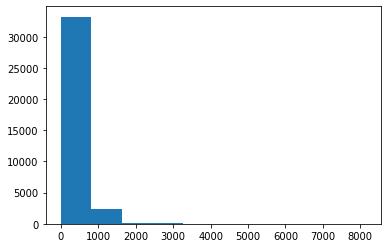

In [ ]:
import matplotlib.pyplot as plt

plt.hist(text_lengths, 10)

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer = TextVectorization()


In [ ]:
text_vectorizer.adapt(train_text)

In [ ]:
vocab_20k_len = len(text_vectorizer.get_vocabulary())
vocab_20k_len

221060

In [ ]:
from tensorflow.keras.layers import Embedding


In [ ]:
embedding_layer = Embedding(vocab_20k_len, 512, mask_zero=True, name = "embedding_layer")

#Callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights = True)


In [ ]:
checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [ ]:
reduce_lr =  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0000001)


#Model 1: basic conv1D

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
embeds = embedding_layer(text_vectors)

x = layers.Conv1D(128, 3, padding = "same", activation="relu")(embeds)
x = layers.GlobalMaxPooling1D()(x)

outputs = layers.Dense(2, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name = "Model_1")

model_1.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(train_dataset, epochs = 1, steps_per_epoch=int(0.1 * len(train_dataset)),
                        validation_data=val_dataset,
                        validation_steps= int(0.1 * len(val_dataset))
                        )

In [ ]:
model_1.evaluate(val_dataset)

281/281 [==============================] - 26s 91ms/step - loss: 0.0488 - accuracy: 0.9913


[0.04878322035074234, 0.9913140535354614]

In [ ]:
# model_1.save('debunker_model_light')


INFO:tensorflow:Assets written to: debunker_model_light/assets


In [ ]:
model_1.predict(['The number of cases of cops brutalizing and killing people of color seems to see no end. Now, we have another case that needs to be shared far and wide. An Alabama woman by the name of Angela Williams shared a graphic photo of her son, lying in a hospital bed with a beaten and fractured face, on Facebook. It needs to be shared far and wide, because this is unacceptable.It is unclear why Williams  son was in police custody or what sort of altercation resulted in his arrest, but when you see the photo you will realize that these details matter not. Cops are not supposed to beat and brutalize those in their custody. In the post you are about to see, Ms. Williams expresses her hope that the cops had their body cameras on while they were beating her son, but I think we all know that there will be some kind of convenient  malfunction  to explain away the lack of existence of dash or body camera footage of what was clearly a brutal beating. Hell, it could even be described as attempted murder. Something tells me that this young man will never be the same. Without further ado, here is what Troy, Alabama s finest decided was appropriate treatment of Angela Williams  son:No matter what the perceived crime of this young man might be, this is completely unacceptable. The cops who did this need to rot in jail for a long, long time   but what you wanna bet they get a paid vacation while the force  investigates  itself, only to have the officers returned to duty posthaste?This, folks, is why we say BLACK LIVES MATTER. No way in hell would this have happened if Angela Williams  son had been white. Please share far and wide, and stay tuned to Addicting Info for further updates.Featured image via David McNew/Stringer/Getty Images'])

array([[0.9947561 , 0.00622777]], dtype=float32)

#Model 2: USE

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding",
    "cat"])

print(embeddings)

tf.Tensor(
[[-0.03133018 -0.06338634 -0.016075   ... -0.0324278  -0.04575739
   0.05370456]
 [ 0.05080861 -0.01652431  0.01573777 ...  0.00976659  0.03170119
   0.01788117]
 [-0.06458329 -0.00307437  0.02157445 ... -0.03023974  0.04162954
   0.00189028]], shape=(3, 512), dtype=float32)


In [ ]:
from tensorflow.keras import layers


In [ ]:
sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  input_shape = [],
                                  dtype = tf.string,
                                  name = "sentence_encoding_layer")

In [ ]:
inputs = layers.Input(shape = [], dtype = tf.string)

embeds = sentence_encoder(inputs)

x = layers.Dense(1024, activation = "relu")(embeds)

x = layers.Dense(512, activation = "relu")(x)

outputs = layers.Dense(2, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name = "Model_1")

model_2.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [ ]:
history_2 = model_2.fit(train_dataset, epochs = 100, steps_per_epoch=len(train_dataset),
                        validation_data=val_dataset,
                        validation_steps= int(0.1 * len(val_dataset)),
                        callbacks = [early_stopping, reduce_lr, model_checkpoint_callback]
                        )

Epoch 1/100
1123/1123 [==============================] - 70s 62ms/step - loss: 0.1278 - accuracy: 0.9512 - val_loss: 0.1284 - val_accuracy: 0.9565
Epoch 2/100
1123/1123 [==============================] - 69s 61ms/step - loss: 0.0752 - accuracy: 0.9728 - val_loss: 0.1355 - val_accuracy: 0.9487
Epoch 3/100
1123/1123 [==============================] - 69s 62ms/step - loss: 0.0515 - accuracy: 0.9818 - val_loss: 0.1450 - val_accuracy: 0.9554
Epoch 4/100
1123/1123 [==============================] - 70s 62ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.1136 - val_accuracy: 0.9676
Epoch 5/100
1123/1123 [==============================] - 68s 61ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.1253 - val_accuracy: 0.9676
Epoch 6/100
1123/1123 [==============================] - 68s 61ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.1419 - val_accuracy: 0.9699
Epoch 7/100
1123/1123 [==============================] - 68s 61ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0

In [ ]:
inputs = layers.Input(shape = [], dtype = tf.string)

embeds = sentence_encoder(inputs)

x = layers.Reshape((1, 512))(embeds)

x = layers.Conv1D(128, 3, padding = "same", activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)

outputs = layers.Dense(2, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name = "Model_2")

model_3.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(train_dataset, epochs = 100, steps_per_epoch=len(train_dataset),
                        validation_data=val_dataset,
                        validation_steps= int(0.1 * len(val_dataset)),
                        callbacks = [early_stopping, reduce_lr, model_checkpoint_callback]
                        )

In [ ]:
model_2.evaluate(val_dataset)

281/281 [==============================] - 16s 59ms/step - loss: 0.0817 - accuracy: 0.9764


[0.08169513195753098, 0.9763919711112976]

In [ ]:
model_3.evaluate(val_dataset)

In [ ]:
model_2.save('debunker_model_comp.h5')